In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import Axes

In [3]:
def get_summary_df(misinfotext_path: str, fakespeak_path: str):
    summary_misinfotext_df = pd.read_excel(misinfotext_path, sheet_name="Summary")
    summary_fakespeak_df = pd.read_excel(fakespeak_path, sheet_name="Summary")
    return pd.concat([summary_misinfotext_df, summary_fakespeak_df])

In [4]:
full_summary_df = get_summary_df(
    misinfotext_path="./data/MisInfoText/Analysis_output/MisInfoText_lexical_density.xlsx",
    fakespeak_path="./data/Fakespeak-ENG/Analysis_output/Fakespeak_lexical_density.xlsx"
)
news_and_blog_summary_df = get_summary_df(
    misinfotext_path="./data/MisInfoText/Analysis_output/news_and_blog/MisInfoText_news_and_blog_lexical_density.xlsx",
    fakespeak_path="./data/Fakespeak-ENG/Analysis_output/news_and_blog/Fakespeak_news_and_blog_lexical_density.xlsx"
)
press_release_summary_df = get_summary_df(
    misinfotext_path="./data/MisInfoText/Analysis_output/press_release/MisInfoText_press_release_lexical_density.xlsx",
    fakespeak_path="./data/Fakespeak-ENG/Analysis_output/press_release/Fakespeak_press_release_lexical_density.xlsx"
)
social_media_summary_df = get_summary_df(
    misinfotext_path="./data/MisInfoText/Analysis_output/social_media/MisInfoText_social_media_lexical_density.xlsx",
    fakespeak_path="./data/Fakespeak-ENG/Analysis_output/social_media/Fakespeak_social_media_lexical_density.xlsx"
)

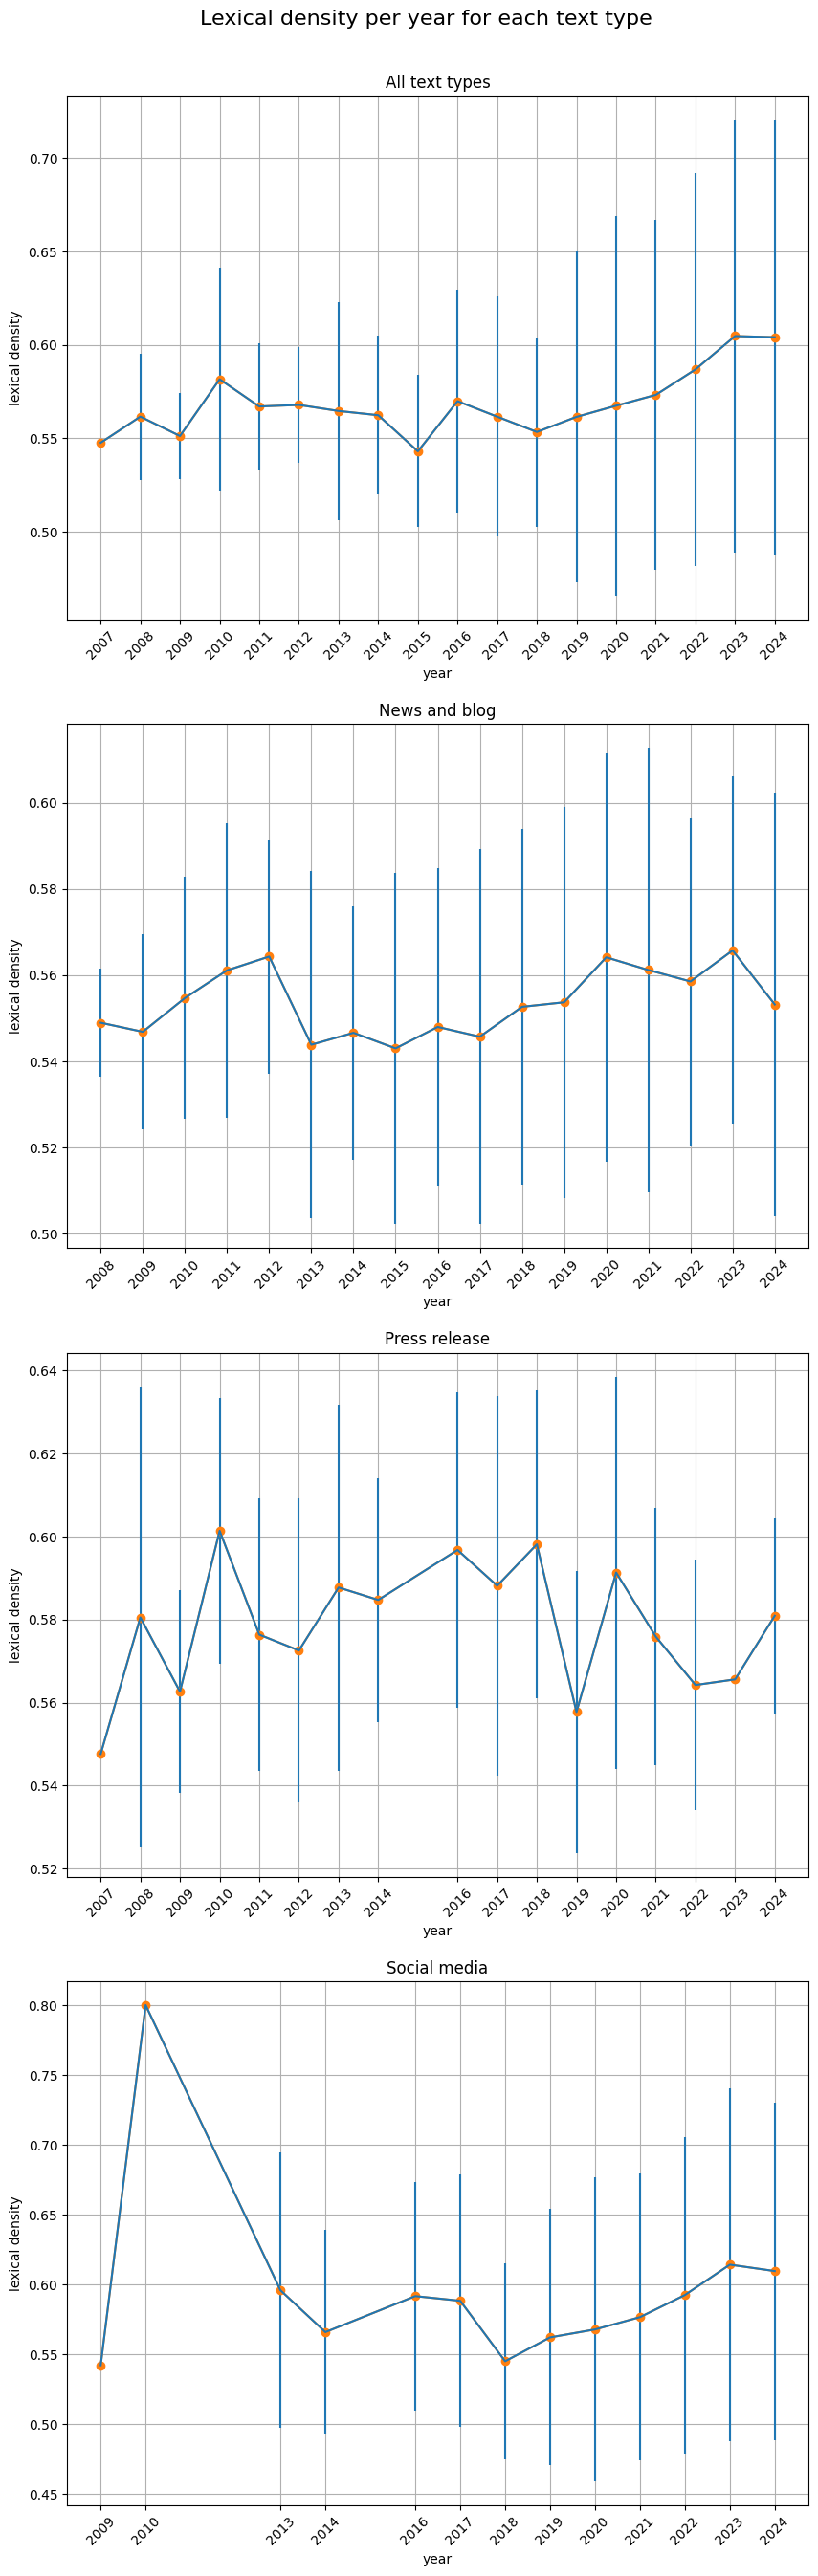

In [5]:
fig, axes = plt.subplots(
    nrows=4, 
    ncols=1, 
    figsize=(10, 30),
    squeeze=False
)

axes_flat: list[Axes] = axes.flatten()

fig.suptitle("Lexical density per year for each text type", fontsize=16)
fig.subplots_adjust(top=0.95)

def plot_data_on_ax(i: str, df: pd.DataFrame, title: str):
    years = list(df["year"])
    
    ax = axes_flat[i]

    ax.set_title(title)

    ax.set_xlabel("year")
    ax.grid(True)
    
    ax.set_xticks(list(years))
    ax.set_xticklabels([str(y) for y in years])
    ax.tick_params(axis="x", rotation=45)

    ax.set_ylabel("lexical density")

    ax.errorbar(
        x=years, 
        y=df["mean"], 
        yerr=df["std"],
    )
    ax.plot(years, df["mean"], marker="o")

plot_data_on_ax(0, full_summary_df, "All text types")
plot_data_on_ax(1, news_and_blog_summary_df, "News and blog")
plot_data_on_ax(2, press_release_summary_df, "Press release")
plot_data_on_ax(3, social_media_summary_df, "Social media")

fig.savefig("./visualization/lexical_density/lineplot.png")

In [6]:
def get_years_dfs(misinfotext_path: str, fakespeak_path: str):
    misinfotext_file = pd.ExcelFile(misinfotext_path)
    
    for year in misinfotext_file.sheet_names:
        if year == "Summary":
            continue

        df = pd.read_excel(misinfotext_file, sheet_name=year)
        df["year"] = year
        yield df
    
    fakespeak_file = pd.ExcelFile(fakespeak_path)
    
    for year in fakespeak_file.sheet_names:
        if year == "Summary":
            continue

        df = pd.read_excel(fakespeak_file, sheet_name=year)
        df["year"] = year
        yield df

def get_full_df(misinfotext_path: str, fakespeak_path: str):
    return pd.concat(get_years_dfs(misinfotext_path, fakespeak_path))

In [7]:
years_dfs = list(get_years_dfs(
    misinfotext_path="./data/MisInfoText/Analysis_output/MisInfoText_lexical_density.xlsx",
    fakespeak_path="./data/Fakespeak-ENG/Analysis_output/Fakespeak_lexical_density.xlsx"
))

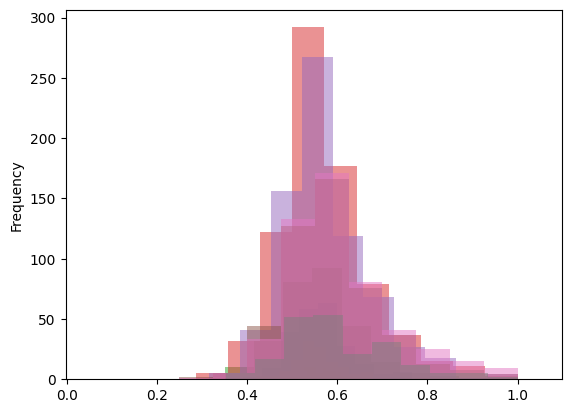

In [8]:
for df in years_dfs:
    df["lexical_density"].plot(kind="hist", alpha=0.5)